In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nus-dsc2021/validation_data/validation_labels.csv
/kaggle/input/nus-dsc2021/validation_data/validation_images/2008.jpg
/kaggle/input/nus-dsc2021/validation_data/validation_images/2029.jpg
/kaggle/input/nus-dsc2021/validation_data/validation_images/2021.jpg
/kaggle/input/nus-dsc2021/validation_data/validation_images/2028.jpg
/kaggle/input/nus-dsc2021/validation_data/validation_images/2003.jpg
/kaggle/input/nus-dsc2021/validation_data/validation_images/2011.jpg
/kaggle/input/nus-dsc2021/validation_data/validation_images/2020.jpg
/kaggle/input/nus-dsc2021/validation_data/validation_images/2016.jpg
/kaggle/input/nus-dsc2021/validation_data/validation_images/2019.jpg
/kaggle/input/nus-dsc2021/validation_data/validation_images/2023.jpg
/kaggle/input/nus-dsc2021/validation_data/validation_images/2010.jpg
/kaggle/input/nus-dsc2021/validation_data/validation_images/2002.jpg
/kaggle/input/nus-dsc2021/validation_data/validation_images/2005.jpg
/kaggle/input/nus-dsc2021/validation_da

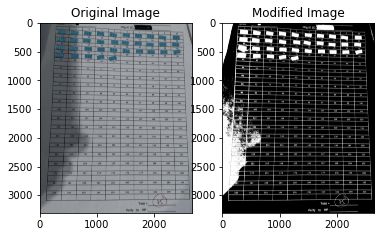

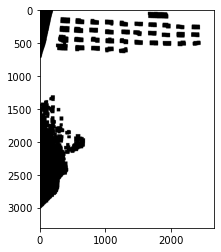

In [39]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
original_image=cv2.imread("../input/nus-dsc2021/train_data/train_images/1022.jpg")
# Not necessary. Make a copy to plot later
img=np.copy(original_image)

#Isolate the areas where the color is black(every channel=0) and white (every channel=255)
turn_to_white = np.where((img[:,:,0]<80))
turn_to_black = np.where((img[:,:,0]>=80))
# white=np.where((img[:,:,0]==255) & (img[:,:,1]==255) & (img[:,:,2]==255))

#Turn black pixels to white and vice versa
img[turn_to_white]=(255,255,255)
img[turn_to_black]=(0,0,0)
# img[white]=(0,0,0)

# Plot the images
fig=plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(original_image)
ax1.set_title('Original Image')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img)
ax2.set_title('Modified Image')
plt.show()

kernel = np.ones((3,3),np.uint8)
dilated = cv2.dilate(img,kernel,iterations = 3)
ret,thresh_img = cv2.threshold(dilated, 0, 255, cv2.THRESH_BINARY_INV)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,40))
morph_img = cv2.morphologyEx(thresh_img, cv2.MORPH_CLOSE, kernel)
shad = cv2.cvtColor(morph_img, cv2.COLOR_BGR2RGB)
shad_gray = cv2.cvtColor(shad, cv2.COLOR_RGB2GRAY)
plt.imshow(shad_gray, cmap="gray")
plt.show()

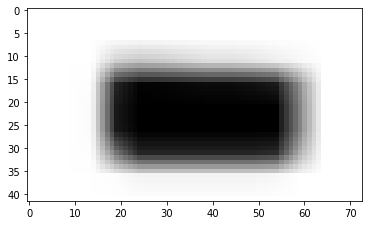

In [40]:
temps = cv2.imread("../input/template111/2021-01-20 (5).png")
temps = cv2.cvtColor(temps, cv2.COLOR_BGR2RGB)
temps_gray = cv2.cvtColor(temps, cv2.COLOR_RGB2GRAY)
#temps = temps[20:25, 15:35]
plt.imshow(temps)
plt.show()

1


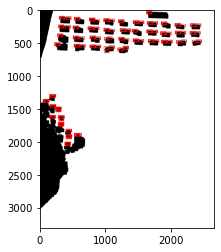

In [41]:
res = cv2.matchTemplate(shad, temps, cv2.TM_CCOEFF_NORMED)
plt.imshow(res, cmap='gray')

w,h = temps_gray.shape[::]

threshold = 0.5 #For TM_CCOEFF_NORMED, larger values = good fit.

loc = np.where( res >= threshold)  

count = 0
for pt in zip(*loc[::-1]): 
    cv2.rectangle(shad, pt, (pt[0] + h, pt[1] + w), (255, 0, 0), 3)
    count+=1

plt.imshow(shad)
print(count)